# Monetary Economics: Chapter 9

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve3.model import Model
from pysolve3.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model DISINF1

In [2]:
def create_disinf1_model():
    model = Model()

    model.set_var_default(0)
    model.var('Ck', desc='Real consumption')
    model.var('C', desc='Consumption at current prices')
    model.var('F', desc='Realized firm profits')
    model.var('Fb', desc='Realized bank profits')
    model.var('IN', desc='Stock of inventories at current costs')
    model.var('INk', desc='Real inventories')
    model.var('INke', desc='Expected real inventories')
    model.var('INkt', desc='Target level of real inventories')
    model.var('Ld', desc='Demand for loans')
    model.var('Ls', desc='Supply of loans')
    model.var('Mh', desc='Deposits held by households')
    model.var('Mhk', desc='Real alue of deposits held by households')
    model.var('Ms', desc='Supply of deposits')
    model.var('N', desc='Employment level')
    model.var('omegat', desc='Target real wage rate')
    model.var('P', desc='Price level')
    model.var('PIC', desc='Inflation rate of unit costs')
    model.var('Rl', desc='Interest rate on loans')
    model.var('Rm', desc='Interest rate on deposits')
    model.var('RRc', desc='Real interest rate on bank loans')
    model.var('S', desc='Sales at current prices')
    model.var('Sk', desc='Real sales')
    model.var('Ske', desc='Expected real sales')
    model.var('UC', desc='Unit costs')
    model.var('WB', desc='The wage bill')
    model.var('Yk', desc='Real output')
    model.var('YD', desc='Disposable income')
    model.var('YDk', desc='Real disposable income')
    model.var('YDkhs', desc='Haig-Simons measure of real disposable income')
    model.var('YDkhse', desc='Expected HS real disposable income')
    model.var('W', desc='Wage rate')

    model.set_param_default(0)
    model.param('alpha0', desc='Autonomous consumption')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('beta', desc='Parameter in expectation formations on real sales')
    model.param('eps', desc='Parameter in expectation formations on real disposable income')
    model.param('gamma', desc='Speed of adjustment of inventories to the target level')
    model.param('phi', desc='Mark-up on unit costs')
    model.param('sigmat', desc='Target inventories to sales ratio')
    model.param('omega0', desc='Exogenous component of the target real wage rate')
    model.param('omega1', desc='Relation between the target real wage rate and productivity')
    model.param('omega2', desc='Relation between the target real rate and the unemploment gap')
    model.param('omega3', desc='Speed of adjustment of the wage rate')

    model.param('ADD', desc='Spread of loans rate over the deposit rate')
    model.param('Nfe', desc='Full employment level')
    model.param('PR', desc='Labor productivity')
    model.param('Rlbar', desc='Rate of interest on bank loans, set exogenously')
    model.param('RRcbar', desc='Real interest rate on bank loans, set exogenously')


    # The production decision
    model.add('Yk = Ske + INke - INk(-1)')
    model.add('INkt = sigmat*Ske')
    model.add('INke = INk(-1) + gamma*(INkt - INk(-1))')
    model.add('INk - INk(-1) = Yk - Sk')
    model.add('Ske = beta*Sk(-1) + (1-beta)*Ske(-1)')
    model.add('Sk = Ck')
    model.add('N = Yk / PR')
    model.add('WB = N*W')
    model.add('UC = WB/Yk')
    model.add('IN = INk*UC')
    
    # The pricing decision
    model.add('S = P*Sk')
    model.add('F = S - WB + IN - IN(-1) - Rl(-1)*IN(-1)')
    model.add('P = (1 + phi)*(1+RRc*sigmat)*UC')
    
    # The banking system
    model.add('Ld = IN')
    model.add('Ls = Ld')
    model.add('Ms = Ls')
    model.add('Rm = Rl - ADD')
    model.add('Fb = Rl(-1)*Ld(-1) - Rm(-1)*Mh(-1)')
    model.add('PIC = (UC/UC(-1)) - 1')
    model.add('RRc = RRcbar')
    model.add('Rl = (1 + RRc)*(1 + PIC) - 1')
    
    # The consumption decision
    model.add('YD = WB + F + Fb + Rm(-1)*Mh(-1)')
    model.add('Mh - Mh(-1) = YD - C')
    model.add('YDkhs = Ck + (Mhk - Mhk(-1))')
    model.add('YDk = YD/P')
    model.add('C = Ck*P')
    model.add('Mhk = Mh/P')
    model.add('Ck = alpha0 + alpha1*YDkhse + alpha2*Mhk(-1)')
    model.add('YDkhse = eps*YDkhs(-1) + (1 - eps)*YDkhse(-1)')
    
    # The inflation process
    model.add('omegat = omega0 + omega1*PR + omega2*(N/Nfe)')
    model.add('W = W(-1)*(1 + omega3*(omegat(-1)-(W(-1)/P(-1))))')

    return model

disinf1_parameters = [('alpha0', 15),
                      ('alpha1', 0.8),
                      ('alpha2', 0.1),
                      ('beta', 0.9),
                      ('eps', 0.8),
                      ('gamma', 0.25),
                      ('phi', 0.24),
                      ('sigmat', 0.2),
                      ('omega1', 1),
                      ('omega2', 1.2),
                      ('omega0', '0.8 - omega1*PR - omega2'),
                      ('omega3', 0.3)]
disinf1_exogenous = [('ADD', 0.02),
                     ('PR', 1),
                     ('RRcbar', 0.04)]
disinf1_variables = [('W', 1),
                     ('UC', 'W/PR'),
                     ('P', '(1+phi)*(1+RRcbar*sigmat)*UC'),
                     ('YDkhs', 'alpha0/(1-alpha1-alpha2*sigmat*UC/P)'),
                     ('Ck', 'YDkhs'),
                     ('Sk', 'Ck'),
                     ('INk', 'sigmat*Sk'),
                     ('IN', 'INk*UC'),
                     ('Ld', 'IN'),
                     ('Mh', 'Ld'),
                     ('Mhk', 'Mh/P'),
                     ('Ms', 'Mh'),
                     ('Ls', 'Ld'),
                     ('Ske', 'Sk'),
                     ('YDkhse', 'YDkhs'),
                     ('omegat', 'W/P'),
                     ('Rl', '(1 + RRcbar) - 1'),
                     ('Rm', 'Rl - ADD'),
                     ('Nfe', 'Sk/PR')]


### Scenario: Model DISINF1, increase in target wage rate

In [3]:
omega0 = create_disinf1_model()
omega0.set_values(disinf1_parameters)
omega0.set_values(disinf1_exogenous)
omega0.set_values(disinf1_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(15):
    omega0.solve(iterations=1000, threshold=1e-6)

# shock the system
omega0.set_values({'omega0': -1.35})

for _ in range(40):
    omega0.solve(iterations=100, threshold=1e-6)

###### Figure 9.4a

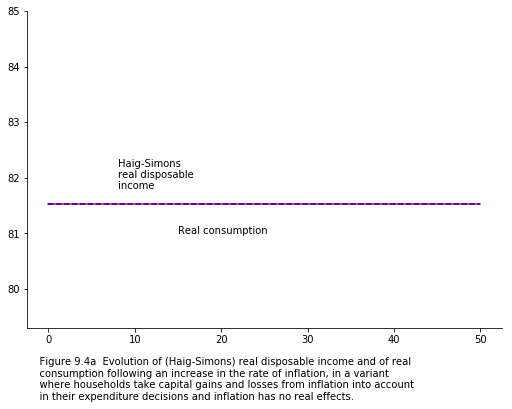

In [4]:
caption = '''
    Figure 9.4a  Evolution of (Haig-Simons) real disposable income and of real
    consumption following an increase in the rate of inflation, in a variant
    where households take capital gains and losses from inflation into account
    in their expenditure decisions and inflation has no real effects.'''
ydkhsdata = [s['YDkhs'] for s in omega0.solutions[5:]]
ckdata = [s['Ck'] for s in omega0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(79.3, 85)

axes.plot(ydkhsdata, linestyle='-', color='r')
axes.plot(ckdata, linestyle='--', color='b')

# add labels
plt.text(15, 81, 'Real consumption')
plt.text(8, 82.2, 'Haig-Simons')
plt.text(8, 82, 'real disposable')
plt.text(8, 81.8, 'income')
fig.text(0.1, -.15, caption);

###### Figure 9.5a

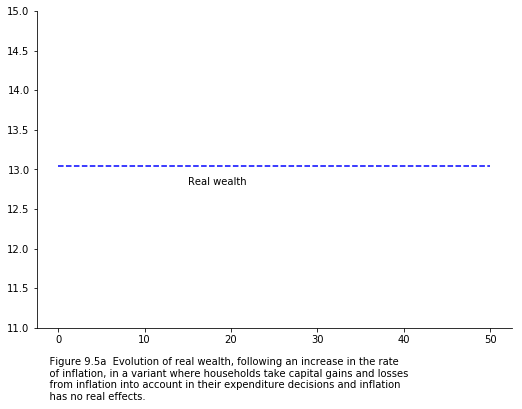

In [5]:
caption = '''
    Figure 9.5a  Evolution of real wealth, following an increase in the rate
    of inflation, in a variant where households take capital gains and losses
    from inflation into account in their expenditure decisions and inflation
    has no real effects.'''
data = [s['Mhk'] for s in omega0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(11, 15)

axes.plot(data, linestyle='--', color='b')

# add labels
plt.text(15, 12.8, 'Real wealth')
fig.text(0.1, -.15, caption);

###### Figure 9.6a

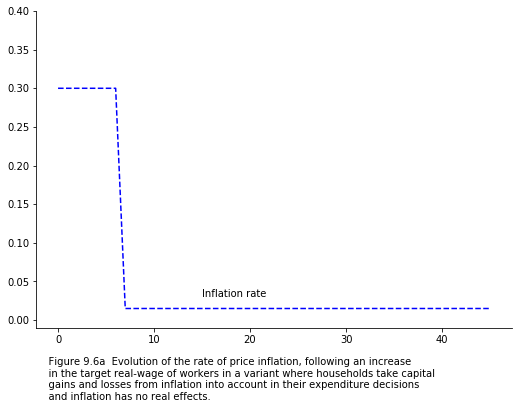

In [6]:
caption = '''
    Figure 9.6a  Evolution of the rate of price inflation, following an increase
    in the target real-wage of workers in a variant where households take capital 
    gains and losses from inflation into account in their expenditure decisions 
    and inflation has no real effects.'''
data = list()

for i in range(10, len(omega0.solutions)):
    s = omega0.solutions[i]
    s_1 = omega0.solutions[i-1]
    
    data.append((s['P']/s_1['P'])-1)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.01, .4)

axes.plot(data, linestyle='--', color='b')

# add labels
plt.text(15, .03, 'Inflation rate')
fig.text(0.1, -.15, caption);